# Classification of IMDB and SST2 Datasets

In [1]:
!pip install transformers pandas scikit-learn
!pip install accelerate -U

In [2]:
!git clone https://github.com/amirghavam93/FMNLP_project_STA_LLM.git

fatal: destination path 'FMNLP_project_STA_LLM' already exists and is not an empty directory.


In [3]:
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import torch
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Function to read the dataset and return a Dataset object
def load_dataset(data_path):
    data = pd.read_csv(data_path)
    data = data.dropna(axis=1, how='any')  # Drop any columns with NaN values
    # Convert labels to string type
    data['label'] = data['label'].astype(int)
    return data

# Custom dataset class for DistilBERT
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Function to compute accuracy
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc}

# Load tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Define dataset prefixes and sizes
dataset_prefixes = ['sst2','imdb', ]
dataset_sizes = ['50', '100', '500', '1000']

# Dictionary to hold accuracy results
results = {}

# Loop through each dataset
for prefix in dataset_prefixes:
    for size in dataset_sizes:
        # Read datasets
        # /content/FMNLP_project_STA_LLM/data/sst2
        non_aug_data = load_dataset(f'/content/FMNLP_project_STA_LLM/data/{prefix}/{prefix}_{size}.csv')
        aug_data = load_dataset(f'/content/FMNLP_project_STA_LLM/data/{prefix}/augmented_{size}/train_mix.csv')
        test_data = load_dataset(f'/content/FMNLP_project_STA_LLM/data/{prefix}/{prefix}_full_test.csv')

        # Create datasets
        train_dataset = CustomDataset(non_aug_data['text'].tolist(), non_aug_data['label'].tolist(), tokenizer)
        aug_train_dataset = CustomDataset(aug_data['text'].tolist(), aug_data['label'].tolist(), tokenizer)
        test_dataset = CustomDataset(test_data['text'].tolist(), test_data['label'].tolist(), tokenizer)

        # Define training arguments
        training_args = TrainingArguments(
            output_dir='./results',
            num_train_epochs=3,
            per_device_train_batch_size=16,
            warmup_steps=500,
            weight_decay=0.01,
            logging_dir='./logs',
            load_best_model_at_end=True,
            evaluation_strategy='epoch',
            save_strategy="epoch",
        )

        # Initialize model
        model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

        # Check if CUDA is available and move the model to GPU
        if torch.cuda.is_available():
            model.cuda()

        # Initialize trainer
        trainer = Trainer(
            model=model,
            args=training_args,
            train_dataset=train_dataset,
            eval_dataset=test_dataset,
            compute_metrics=compute_metrics
        )

        # Train the model
        trainer.train()

        # Evaluate the model
        evaluation_results = trainer.evaluate()

        # Store the results
        results[f'{prefix}_{size}_non_aug'] = evaluation_results['eval_accuracy']

        # Repeat the training for the augmented data
        trainer.train_dataset = aug_train_dataset
        trainer.train()
        evaluation_results = trainer.evaluate()
        results[f'{prefix}_{size}_aug'] = evaluation_results['eval_accuracy']

# Print results
for dataset, accuracy in results.items():
    print(f'Accuracy for {dataset}: {accuracy:.2%}')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'classifier.bias', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.694827,0.509174
2,No log,0.694784,0.508028
3,No log,0.694748,0.504587


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.695045,0.509174
2,No log,0.699625,0.509174
3,No log,0.718772,0.509174


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'classifier.bias', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.700326,0.490826
2,No log,0.699049,0.490826
3,No log,0.696863,0.490826


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.685208,0.621560
2,No log,0.675638,0.521789
3,No log,0.625012,0.698394


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'classifier.bias', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.692495,0.491972
2,No log,0.676356,0.510321
3,No log,0.584666,0.747706


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.554250,0.826835
2,No log,1.013831,0.801606
3,0.158000,1.257983,0.807339


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'classifier.bias', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.672115,0.662844
2,No log,0.413899,0.818807
3,No log,0.428945,0.802752


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.736097,0.816514
2,0.195000,0.879474,0.832569
3,0.046800,1.185278,0.815367


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'classifier.bias', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.697622,0.500000
2,No log,0.697474,0.500000
3,No log,0.697411,0.500000


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.696967,0.500000
2,No log,0.693237,0.500000
3,No log,0.680349,0.505960


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'classifier.bias', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.697515,0.500000
2,No log,0.697107,0.500000
3,No log,0.696307,0.500000


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.689275,0.500000
2,No log,0.633260,0.673400
3,No log,0.782311,0.620800


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'classifier.bias', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.691576,0.500160
2,No log,0.670235,0.659800
3,No log,0.543179,0.814640


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.418197,0.861760
2,No log,1.066118,0.820040
3,0.148800,0.837815,0.861200


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'classifier.bias', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.670983,0.614880
2,No log,0.390449,0.837160
3,No log,0.300430,0.880760


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.534700,0.875560
2,0.141400,0.838319,0.843600
3,0.042200,0.721045,0.886200


Accuracy for sst2_50_non_aug: 50.46%
Accuracy for sst2_50_aug: 50.92%
Accuracy for sst2_100_non_aug: 49.08%
Accuracy for sst2_100_aug: 69.84%
Accuracy for sst2_500_non_aug: 74.77%
Accuracy for sst2_500_aug: 82.68%
Accuracy for sst2_1000_non_aug: 81.88%
Accuracy for sst2_1000_aug: 81.65%
Accuracy for imdb_50_non_aug: 50.00%
Accuracy for imdb_50_aug: 50.60%
Accuracy for imdb_100_non_aug: 50.00%
Accuracy for imdb_100_aug: 67.34%
Accuracy for imdb_500_non_aug: 81.46%
Accuracy for imdb_500_aug: 86.18%
Accuracy for imdb_1000_non_aug: 88.08%
Accuracy for imdb_1000_aug: 87.56%


In [16]:
results = results.items()

# Convert the list of tuples to a dictionary
results = dict(results)

# Now data_dict is a dictionary with the data from list_of_tuples
print(results)

{'sst2_50_non_aug': 0.5045871559633027, 'sst2_50_aug': 0.5091743119266054, 'sst2_100_non_aug': 0.4908256880733945, 'sst2_100_aug': 0.698394495412844, 'sst2_500_non_aug': 0.7477064220183486, 'sst2_500_aug': 0.8268348623853211, 'sst2_1000_non_aug': 0.8188073394495413, 'sst2_1000_aug': 0.8165137614678899, 'imdb_50_non_aug': 0.5, 'imdb_50_aug': 0.50596, 'imdb_100_non_aug': 0.5, 'imdb_100_aug': 0.6734, 'imdb_500_non_aug': 0.81464, 'imdb_500_aug': 0.86176, 'imdb_1000_non_aug': 0.88076, 'imdb_1000_aug': 0.87556}


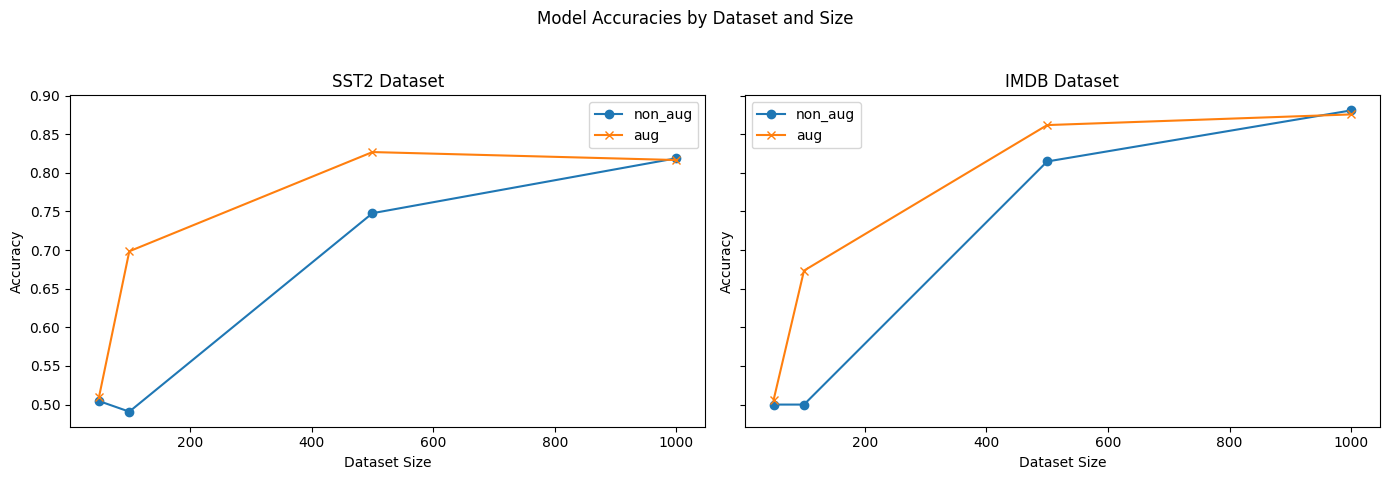

In [17]:
# Extracting the sizes and scores for augmented and non-augmented for both datasets
sizes = ['50', '100', '500', '1000']
datasets = {'sst2': [], 'imdb': []}

# Separating the data by dataset and augmentation type
for size in sizes:
    for dataset in datasets:
        non_aug_key = f'{dataset}_{size}_non_aug'
        aug_key = f'{dataset}_{size}_aug'
        if non_aug_key in results and aug_key in results:
            datasets[dataset].append((results[non_aug_key], results[aug_key]))

# Plotting the data
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

for ax, (dataset, scores) in zip(axes, datasets.items()):
    non_aug_scores, aug_scores = zip(*scores)
    sizes_int = [int(size) for size in sizes]

    ax.plot(sizes_int, non_aug_scores, label='non_aug', marker='o')
    ax.plot(sizes_int, aug_scores, label='aug', marker='x')

    ax.set_title(f'{dataset.upper()} Dataset')
    ax.set_xlabel('Dataset Size')
    ax.set_ylabel('Accuracy')
    ax.legend()

plt.suptitle('Model Accuracies by Dataset and Size')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
